<a href="https://colab.research.google.com/github/Valenttanda/Financial-Fraud-Detection-Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek DSF 39.0 Dibimbing: Data - Data Science
- Owner: Mohammad Valeriant
- Dataset: [Financial Fraud Detection](https://www.kaggle.com/datasets/aryan208/financial-transactions-dataset-for-fraud-detection)

## Import library yang dibutuhkan dan mengambil dataset dari kaggle menggunakan Kaggle API

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Ambil dataset dari kaggle dengan API
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"valenttanda","key":"40d890bbda8cbadb4dca5a73e455c145"}'}

In [3]:
# Buat folder /.kaggle untuk menampung file kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d aryan208/financial-transactions-dataset-for-fraud-detection
!unzip financial-transactions-dataset-for-fraud-detection.zip

Dataset URL: https://www.kaggle.com/datasets/aryan208/financial-transactions-dataset-for-fraud-detection
License(s): CC0-1.0
Archive:  financial-transactions-dataset-for-fraud-detection.zip
  inflating: financial_fraud_detection_dataset.csv  


## Dataset dan informasinya

In [3]:
# Tampilkan data
data = pd.read_csv('financial_fraud_detection_dataset.csv')
data.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601


In [4]:
# Cek dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

In [5]:
print("Jumlah data yang hilang: \n", data.isnull().sum())
print("\nJumlah data duplikat: ", data.duplicated().sum())

Jumlah data yang hilang: 
 transaction_id                       0
timestamp                            0
sender_account                       0
receiver_account                     0
amount                               0
transaction_type                     0
merchant_category                    0
location                             0
device_used                          0
is_fraud                             0
fraud_type                     4820447
time_since_last_transaction     896513
spending_deviation_score             0
velocity_score                       0
geo_anomaly_score                    0
payment_channel                      0
ip_address                           0
device_hash                          0
dtype: int64

Jumlah data duplikat:  0


In [6]:
data.describe()

,amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
count,5.000000e+06,4.103487e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,3.589343e+02,1.525799e+00,-3.881160e-04,1.050132e+01,5.000293e-01
std,4.699333e+02,3.576569e+03,1.000807e+00,5.766842e+00,2.886349e-01
min,1.000000e-02,-8.777814e+03,-5.260000e+00,1.000000e+00,0.000000e+00
25%,2.657000e+01,-2.562376e+03,-6.800000e-01,5.000000e+00,2.500000e-01
50%,1.386700e+02,8.442747e-01,0.000000e+00,1.100000e+01,5.000000e-01
75%,5.038900e+02,2.568339e+03,6.700000e-01,1.600000e+01,7.500000e-01
max,3.520570e+03,8.757758e+03,5.020000e+00,2.000000e+01,1.000000e+00


## Data Cleaning

### Handling Data Type

In [7]:
# Buang angka desimal dari kolom timestamp
data['timestamp'] = data['timestamp'].str.split('.').str[0]
# Ganti huruf 'T' di dalam data kolom timestamp
data['timestamp'] = data['timestamp'].str.replace('T', ' ')
data

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22 09:22:43,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04 01:58:02,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12 11:39:33,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10 06:04:43,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24 08:09:02,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,T5099995,2023-11-17 23:20:29,ACC597319,ACC749300,10.87,withdrawal,retail,Toronto,atm,False,NaN,1416.524233,-0.14,17,0.18,UPI,243.92.38.163,D4439579
4999996,T5099996,2023-09-23 11:23:20,ACC749625,ACC709783,181.40,payment,grocery,Sydney,atm,False,NaN,999.089702,-1.79,4,0.58,wire_transfer,28.252.18.249,D5029311
4999997,T5099997,2023-11-18 00:52:34,ACC629492,ACC680736,12.54,payment,utilities,New York,mobile,False,NaN,3871.584025,-0.30,6,0.99,card,111.199.174.121,D6333607
4999998,T5099998,2023-03-25 04:32:13,ACC984720,ACC296935,376.29,deposit,restaurant,Dubai,pos,False,NaN,-4096.765453,-1.43,5,0.32,wire_transfer,221.110.215.14,D1551203


In [8]:
# Ubah tipe data kolom timestamp menjadi datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   transaction_id               object        
 1   timestamp                    datetime64[ns]
 2   sender_account               object        
 3   receiver_account             object        
 4   amount                       float64       
 5   transaction_type             object        
 6   merchant_category            object        
 7   location                     object        
 8   device_used                  object        
 9   is_fraud                     bool          
 10  fraud_type                   object        
 11  time_since_last_transaction  float64       
 12  spending_deviation_score     float64       
 13  velocity_score               int64         
 14  geo_anomaly_score            float64       
 15  payment_channel              object        
 16  

### Handling Missing Values

In [9]:
# Tampilkan data yang hilang
data[data.isnull().any(axis=1)]

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22 09:22:43,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04 01:58:02,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12 11:39:33,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10 06:04:43,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24 08:09:02,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,T5099995,2023-11-17 23:20:29,ACC597319,ACC749300,10.87,withdrawal,retail,Toronto,atm,False,NaN,1416.524233,-0.14,17,0.18,UPI,243.92.38.163,D4439579
4999996,T5099996,2023-09-23 11:23:20,ACC749625,ACC709783,181.40,payment,grocery,Sydney,atm,False,NaN,999.089702,-1.79,4,0.58,wire_transfer,28.252.18.249,D5029311
4999997,T5099997,2023-11-18 00:52:34,ACC629492,ACC680736,12.54,payment,utilities,New York,mobile,False,NaN,3871.584025,-0.30,6,0.99,card,111.199.174.121,D6333607
4999998,T5099998,2023-03-25 04:32:13,ACC984720,ACC296935,376.29,deposit,restaurant,Dubai,pos,False,NaN,-4096.765453,-1.43,5,0.32,wire_transfer,221.110.215.14,D1551203


Karena jumlah data yang hilang pada kolom fraud_type melebihi 90%, maka kolom fraud_type tidak digunakan

In [10]:
# Drop kolom fraud_type
data.drop('fraud_type', axis=1, inplace=True)
data

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22 09:22:43,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04 01:58:02,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12 11:39:33,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10 06:04:43,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24 08:09:02,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,T5099995,2023-11-17 23:20:29,ACC597319,ACC749300,10.87,withdrawal,retail,Toronto,atm,False,1416.524233,-0.14,17,0.18,UPI,243.92.38.163,D4439579
4999996,T5099996,2023-09-23 11:23:20,ACC749625,ACC709783,181.40,payment,grocery,Sydney,atm,False,999.089702,-1.79,4,0.58,wire_transfer,28.252.18.249,D5029311
4999997,T5099997,2023-11-18 00:52:34,ACC629492,ACC680736,12.54,payment,utilities,New York,mobile,False,3871.584025,-0.30,6,0.99,card,111.199.174.121,D6333607
4999998,T5099998,2023-03-25 04:32:13,ACC984720,ACC296935,376.29,deposit,restaurant,Dubai,pos,False,-4096.765453,-1.43,5,0.32,wire_transfer,221.110.215.14,D1551203


In [11]:
print("Jumlah data yang hilang: \n", data.isnull().sum())

Jumlah data yang hilang: 
 transaction_id                      0
timestamp                           0
sender_account                      0
receiver_account                    0
amount                              0
transaction_type                    0
merchant_category                   0
location                            0
device_used                         0
is_fraud                            0
time_since_last_transaction    896513
spending_deviation_score            0
velocity_score                      0
geo_anomaly_score                   0
payment_channel                     0
ip_address                          0
device_hash                         0
dtype: int64


In [12]:
# Cek jumlah data dari setiap kolom
for column in data.columns:
  print(f"Jumlah data pada kolom {column}:\n", data[column].value_counts(), "\n")

Jumlah data pada kolom transaction_id:
 transaction_id
T5099983    1
T5099982    1
T5099981    1
T5099980    1
T5099979    1
           ..
T100004     1
T100003     1
T100002     1
T100001     1
T100000     1
Name: count, Length: 5000000, dtype: int64 

Jumlah data pada kolom timestamp:
 timestamp
2023-09-24 22:34:58    5
2023-01-19 19:32:03    5
2023-12-22 02:38:47    5
2023-12-12 21:40:55    5
2023-03-11 12:06:37    5
                      ..
2023-09-03 01:22:35    1
2023-06-23 06:07:40    1
2023-12-14 11:36:42    1
2023-09-04 01:55:32    1
2023-01-20 03:49:31    1
Name: count, Length: 4623346, dtype: int64 

Jumlah data pada kolom sender_account:
 sender_account
ACC983922    20
ACC407908    19
ACC138486    19
ACC931649    19
ACC862649    19
             ..
ACC268093     1
ACC781059     1
ACC465996     1
ACC183274     1
ACC863285     1
Name: count, Length: 896513, dtype: int64 

Jumlah data pada kolom receiver_account:
 receiver_account
ACC400278    23
ACC804655    20
ACC719493    19

In [13]:
# Membangun bilangan acak untuk mengisi nilai yang hilang pada kolom time_since_last_transaction antara nilai terkecil dan terbesarnya
min_value = data['time_since_last_transaction'].min()
max_value = data['time_since_last_transaction'].max()
data['time_since_last_transaction'] = data['time_since_last_transaction'].fillna(round(random.uniform(min_value, max_value), 6))

In [14]:
# Cek data yang hilang
print("Jumlah data yang hilang: \n", data.isnull().sum())

Jumlah data yang hilang: 
 transaction_id                 0
timestamp                      0
sender_account                 0
receiver_account               0
amount                         0
transaction_type               0
merchant_category              0
location                       0
device_used                    0
is_fraud                       0
time_since_last_transaction    0
spending_deviation_score       0
velocity_score                 0
geo_anomaly_score              0
payment_channel                0
ip_address                     0
device_hash                    0
dtype: int64


### Cek Outlier

Jumlah outlier pada kolom amount: 412449


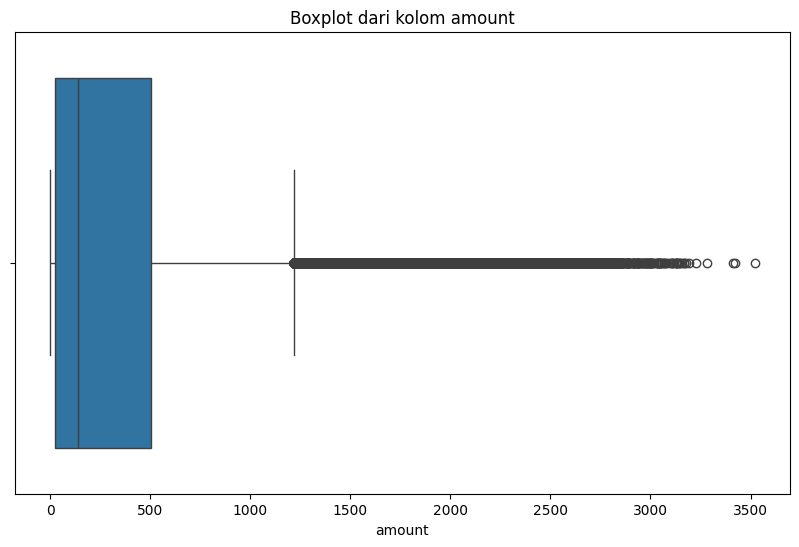



Jumlah outlier pada kolom time_since_last_transaction: 0


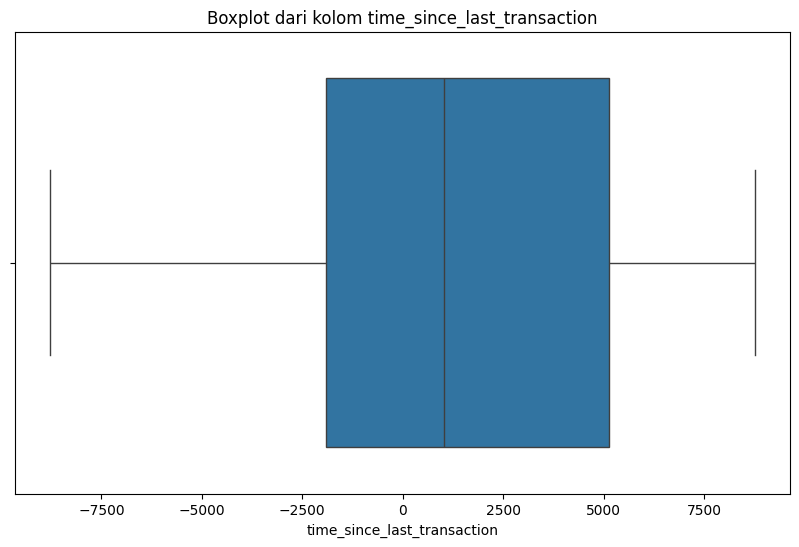



Jumlah outlier pada kolom spending_deviation_score: 35075


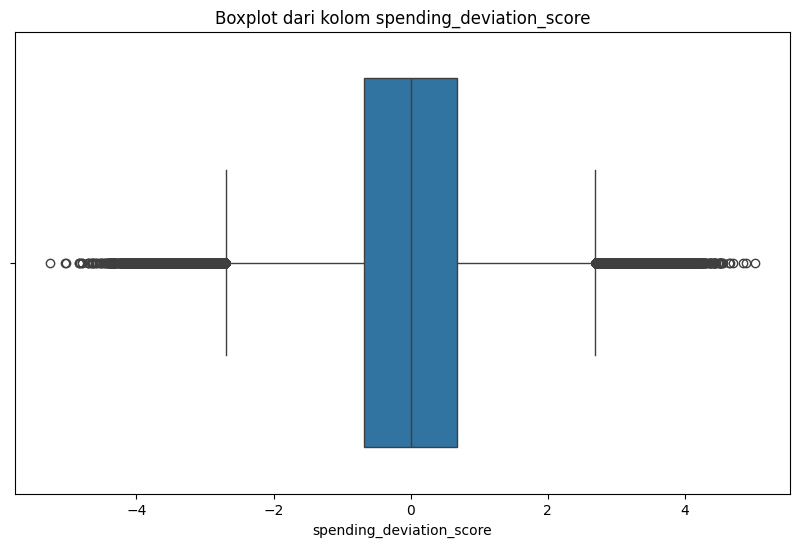



Jumlah outlier pada kolom velocity_score: 0


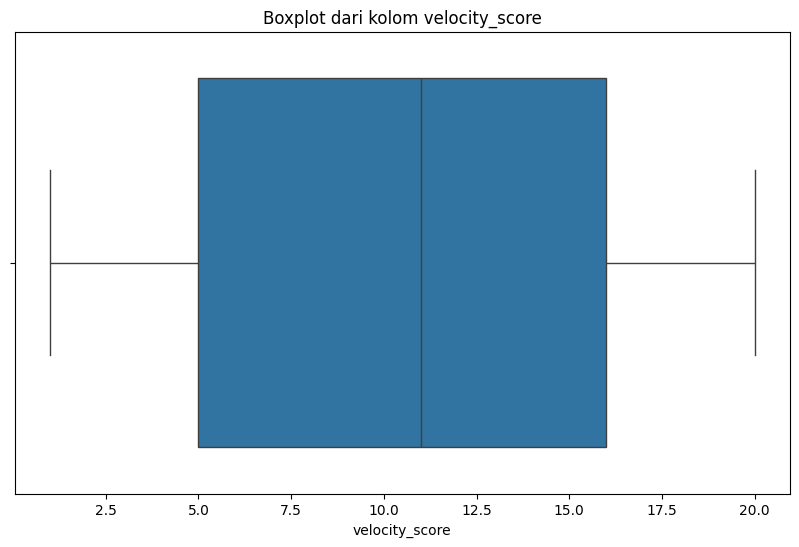



Jumlah outlier pada kolom geo_anomaly_score: 0


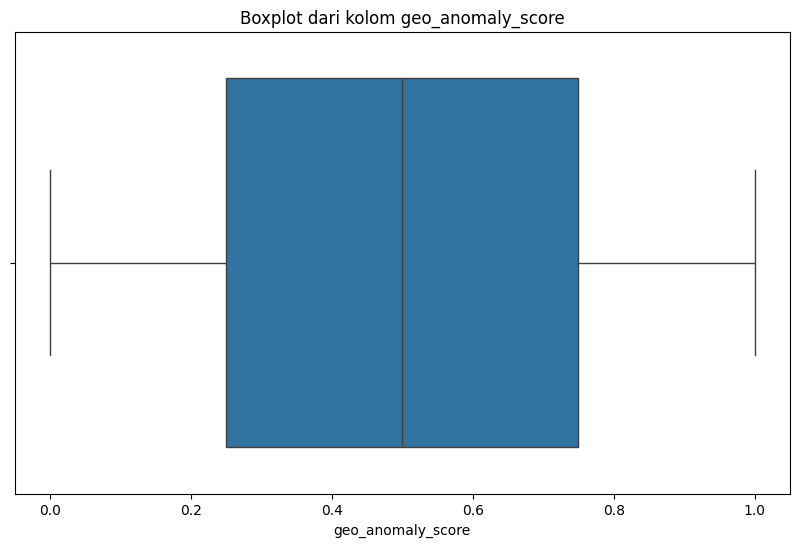

In [15]:
numerical = data.select_dtypes(include=np.number).columns
for column in numerical:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower) | (data[column] > upper)]
  print(f"Jumlah outlier pada kolom {column}: {len(outliers)}")

  # Boxplot untuk cek outlier
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=data, x=column)
  plt.title(f"Boxplot dari kolom {column}")
  plt.show()
  print("\n")

Karena data merupakan data ekonomi, yang memungkinkan seseorang memiliki nilai sangat tinggi, maka outlier diabaikan

### Visualisasi Data

Countplot dari semua kolom dengan nilai unik < 20

In [16]:
# Cek jumlah nilai unik dari setiap kolom
col = []
for column in data.columns:
  if data[column].nunique() < 20:
    col.append(column)
col

['transaction_type',
 'merchant_category',
 'location',
 'device_used',
 'is_fraud',
 'payment_channel']

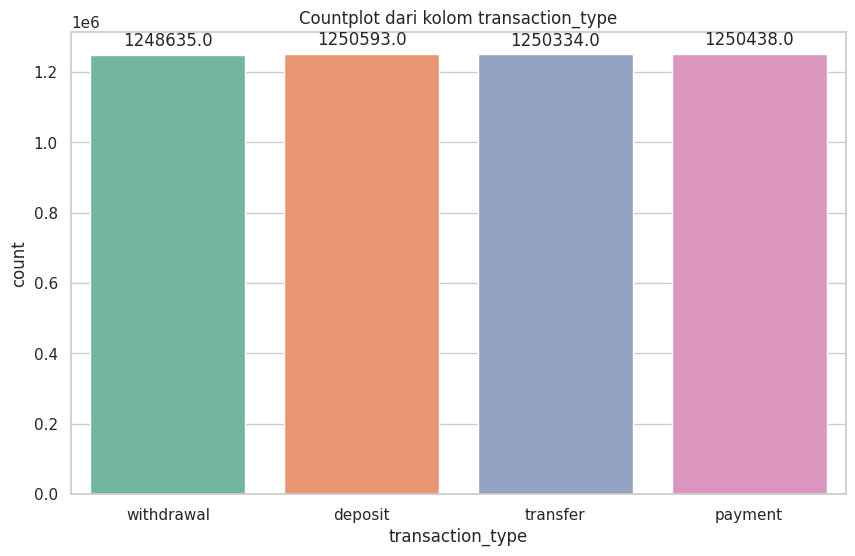

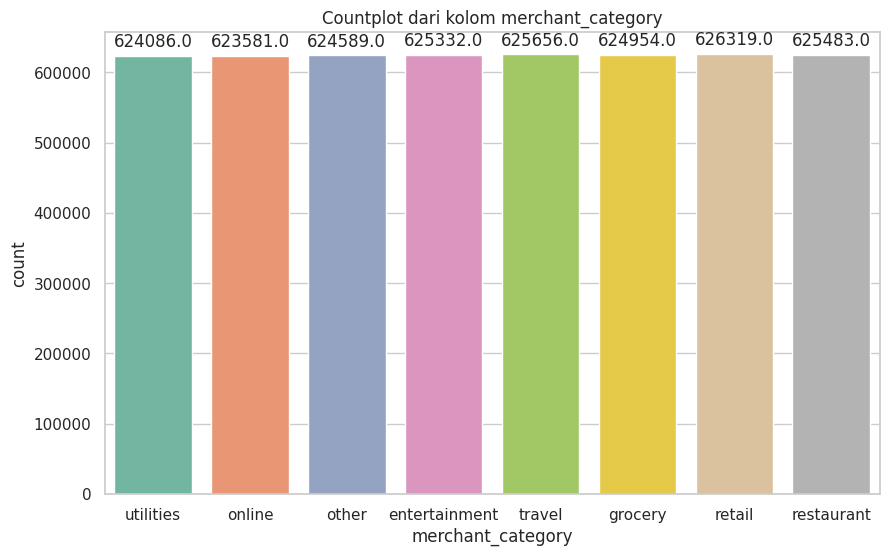

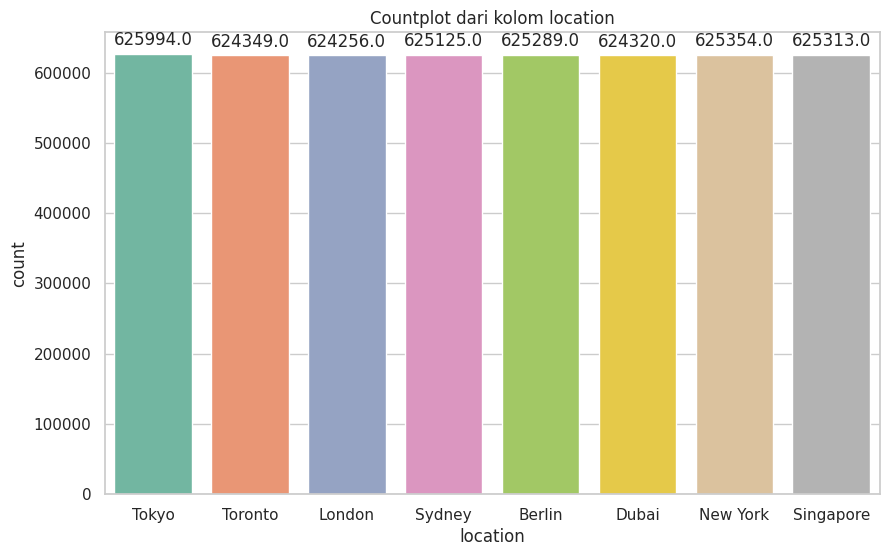

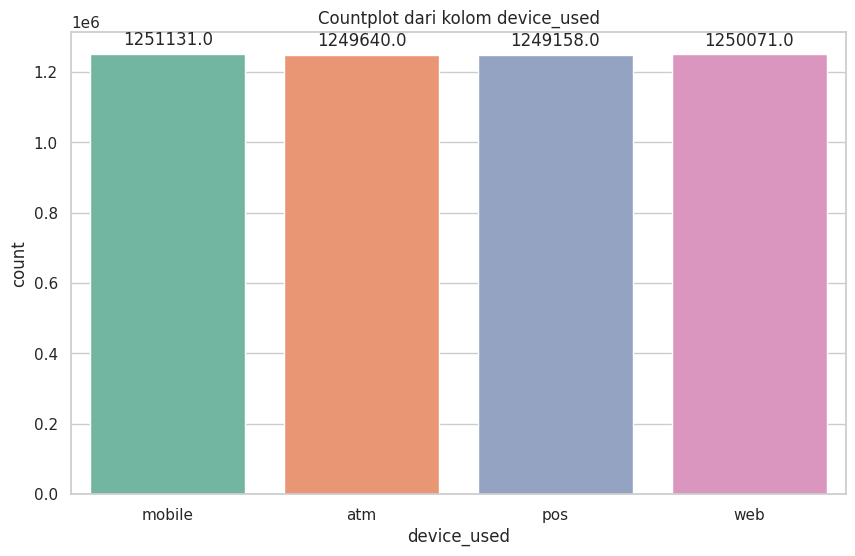

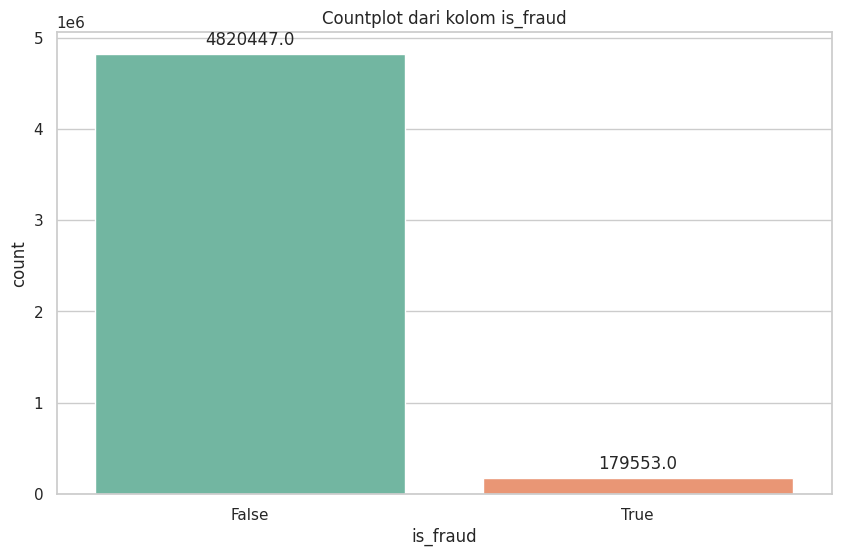

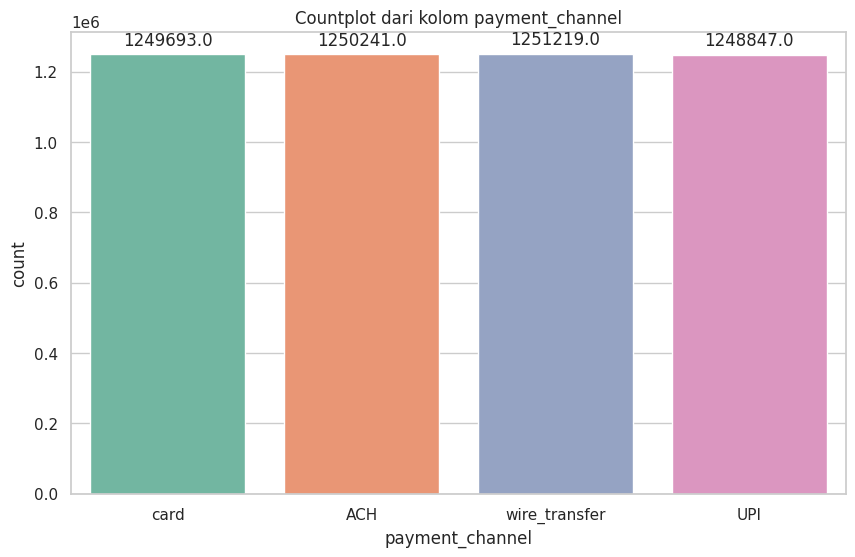

In [17]:
# Countplot untuk kolom dengan col
for column in col:
  plt.figure(figsize=(10, 6))
  sns.set(style="whitegrid")
  ax = sns.countplot(data=data, x=column, palette='Set2')
  for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
  plt.title(f"Countplot dari kolom {column}")
  plt.show()

1. Jumlah pembayaran terbanyak dengan device_used berdasarkan location

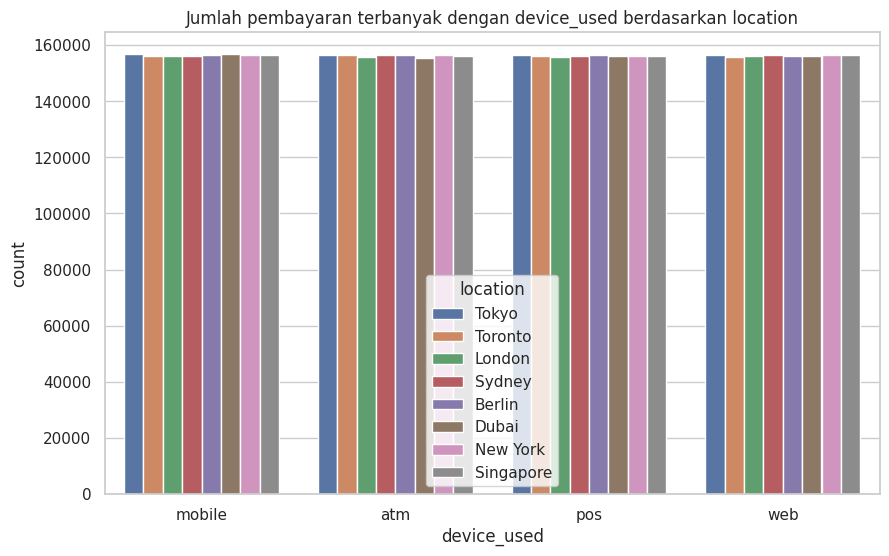


Jumlah pembayaran terbanyak:


device_used  location 
atm          New York     156611
             Sydney       156521
             Tokyo        156482
             Toronto      156347
             Berlin       156313
             Singapore    156084
             London       155911
             Dubai        155371
mobile       Tokyo        156836
             Dubai        156695
             Singapore    156609
             New York     156364
             Berlin       156326
             London       156249
             Sydney       156093
             Toronto      155959
pos          Berlin       156505
             Tokyo        156337
             Dubai        156177
             Toronto      156116
             Singapore    156083
             New York     156080
             Sydney       155957
             London       155903
web          Sydney       156554
             Singapore    156537
             Tokyo        156339
             New York     156299
             London       156193
             Berlin       156145
             Dubai        156077
             Toronto      155927
Name: count, dtype: int64

In [25]:
# Plot jumlah pembayaran terbanyak dengan device_used berdasarkan location
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='device_used', hue='location')
plt.title("Jumlah pembayaran terbanyak dengan device_used berdasarkan location")
plt.show()

# Hitung jumlah pembayaran terbanyak
print("\nJumlah pembayaran terbanyak:")
data.groupby('device_used')['location'].value_counts()

2. Jumlah fraud berdasarkan location

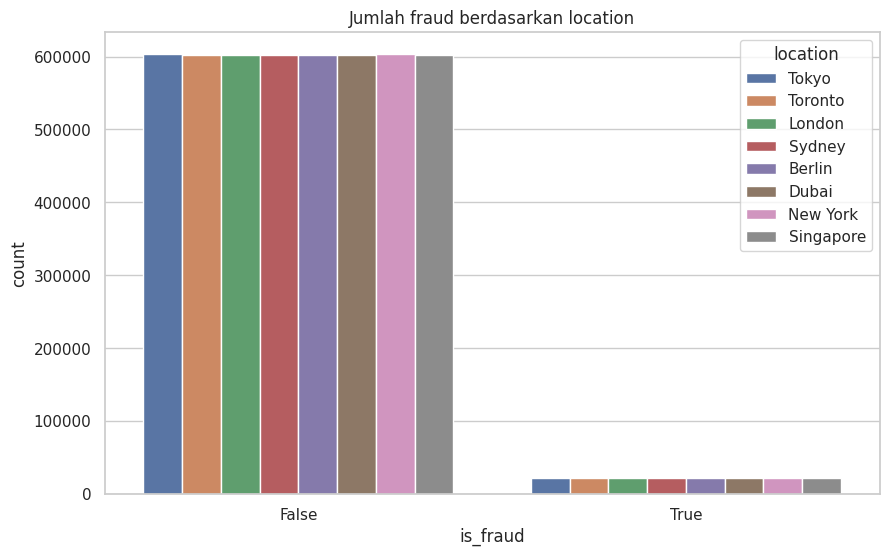


Top 3 jumlah fraud berdasarkan location:


is_fraud  location 
False     Tokyo        603574
          New York     602894
          Berlin       602854
          Singapore    602852
          Sydney       602667
          Dubai        601980
          Toronto      601848
          London       601778
True      Toronto       22501
          London        22478
          Singapore     22461
          New York      22460
          Sydney        22458
          Berlin        22435
          Tokyo         22420
          Dubai         22340
Name: count, dtype: int64

In [26]:
# Plot jumlah fraud berdasarkan location
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='is_fraud', hue='location')
plt.title("Jumlah fraud berdasarkan location")
plt.show()

# Hitung top 3 jumlah fraud
print("\nTop 3 jumlah fraud berdasarkan location:")
data.groupby('is_fraud')['location'].value_counts()

3. Jumlah fraud dengan payment_channel

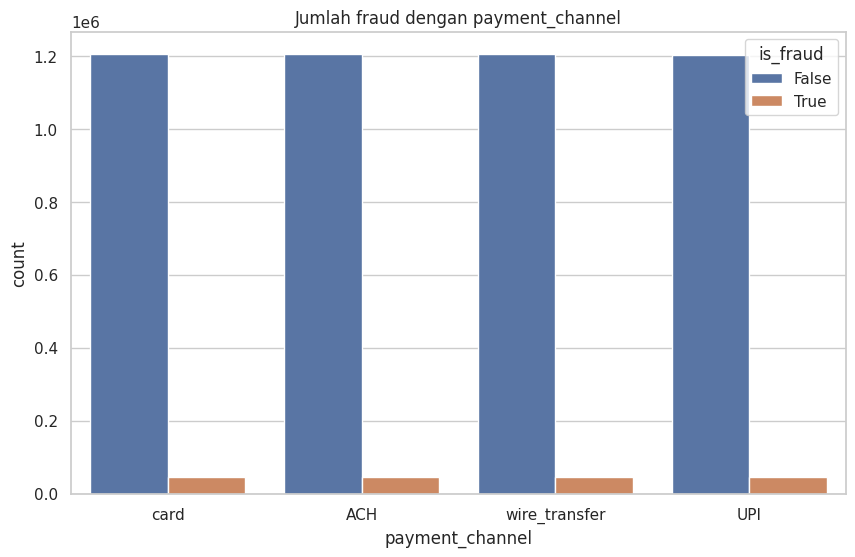


Jumlah fraud berdasarkan payment_channel:


payment_channel  is_fraud
ACH              False       1205503
                 True          44738
UPI              False       1203951
                 True          44896
card             False       1204808
                 True          44885
wire_transfer    False       1206185
                 True          45034
Name: count, dtype: int64

In [20]:
# Plot jumlah fraud dengan payment_channel
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='payment_channel', hue='is_fraud')
plt.title("Jumlah fraud dengan payment_channel")
plt.show()

# Hitung jumlah fraud berdasarkan payment_channel
print("\nJumlah fraud berdasarkan payment_channel:")
data.groupby('payment_channel')['is_fraud'].value_counts()

4. Jumlah fraud yang terdeteksi sepanjang tahun




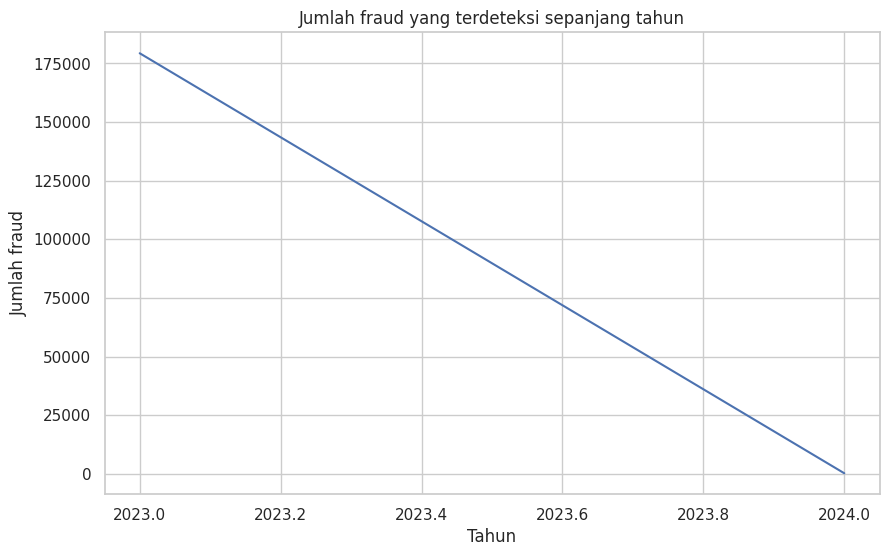


Jumlah fraud yang terdeteksi sepanjang tahun:


,is_fraud
timestamp,
2023,179342
2024,211


In [21]:
# Plot jumlah fraud yang terdeteksi sepanjang tahun
fraud_time = data.groupby(data['timestamp'].dt.year)['is_fraud'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_time.index, y=fraud_time.values)
plt.title("Jumlah fraud yang terdeteksi sepanjang tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah fraud")
plt.show()

# Hitung jumlah fraud yang terdeteksi sepanjang tahun
print("\nJumlah fraud yang terdeteksi sepanjang tahun:")
fraud_time